<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/Exercises/01Pytorch_workflow_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create a straight line dataset using the linear regression formula (weight * X + bias).

* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [1]:
import torch
from torch import nn
import  matplotlib.pyplot as plt

In [2]:
#1.Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10] , y[:10]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [3]:
len(X), len(y)

(100, 100)

In [4]:
# Split the data into 80% training, 20% testing.
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g" , s=4, label="tesing data")

    if predictions is not None:
       plt.scatter(test_data,predictions,c ='r', s=4, label="predictions")

    plt.legend(prop={"size": 14})

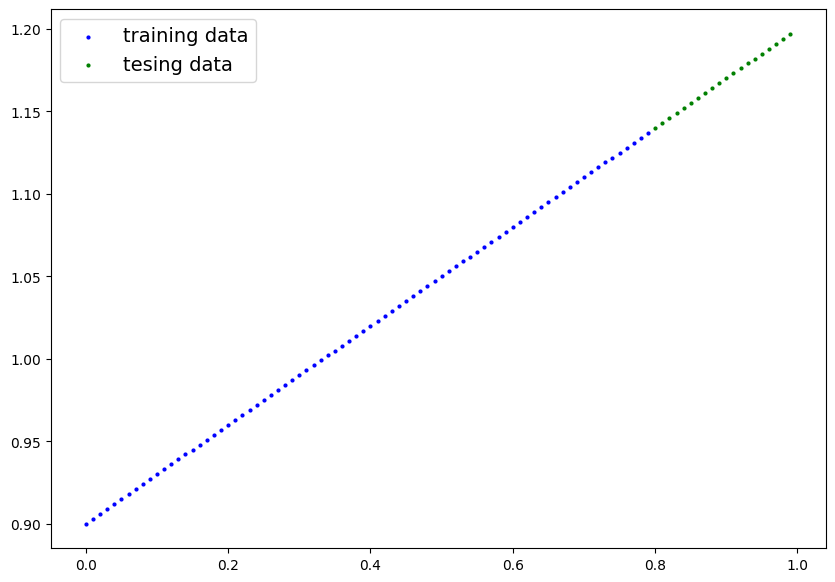

In [6]:
plot_predictions()

2.Build a PyTorch model by subclassing nn.Module.

Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

Once you've constructed the model, make an instance of it and check its state_dict().
Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [7]:
#subclass the nn.module to make our model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer= nn.Linear(in_features=1, out_features=1)
  #define the forward computation (input data x flows through nn.linear)
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

#set a manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

3.Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

Write a training loop to perform the appropriate training steps for 300 epochs.
The training loop should test the model on the test dataset every 20 epochs.

In [8]:
#create a loss function
loss_fn = nn.L1Loss()

#create an optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


In [9]:
torch.manual_seed(42)

#training
#set the number of epochs
epochs= 500
for epoch in range(epochs):
    model_1.train()
    #forward pass
    y_pred = model_1(X_train)
    #calculate loss
    loss= loss_fn(y_pred,y_train)
    #zero grad optimizer
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    #step the optimizer
    optimizer.step()

    ##testing
    model_1.eval()

    #1.forward pass
    with torch.inference_mode():
      test_pred = model_1(X_test)

      #calculate the testing loss
      test_loss = loss_fn(test_pred,y_test)

    if epoch  % 20== 0:
      print(f"epoch:{epoch}| Train loss: {loss} | Test loss:{test_loss}")

epoch:0| Train loss: 0.12756133079528809 | Test loss:0.33650320768356323
epoch:20| Train loss: 0.08187223970890045 | Test loss:0.2184026539325714
epoch:40| Train loss: 0.07207288593053818 | Test loss:0.17458662390708923
epoch:60| Train loss: 0.06507987529039383 | Test loss:0.15310418605804443
epoch:80| Train loss: 0.05822876840829849 | Test loss:0.1367770880460739
epoch:100| Train loss: 0.05137667804956436 | Test loss:0.12079393863677979
epoch:120| Train loss: 0.044525571167469025 | Test loss:0.10446684062480927
epoch:140| Train loss: 0.037674423307180405 | Test loss:0.08813951164484024
epoch:160| Train loss: 0.03082224354147911 | Test loss:0.0721558928489685
epoch:180| Train loss: 0.02397105097770691 | Test loss:0.055828340351581573
epoch:200| Train loss: 0.01711984910070896 | Test loss:0.03950077295303345
epoch:220| Train loss: 0.010267667472362518 | Test loss:0.02351721003651619
epoch:240| Train loss: 0.0034169009886682034 | Test loss:0.007191836833953857
epoch:260| Train loss: 0.00

4.Make predictions with the trained model on the test data.
Visualize these predictions against the original training and testing data

In [10]:
#make predictiions

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[1.1333],
        [1.1363],
        [1.1393],
        [1.1423],
        [1.1454],
        [1.1484],
        [1.1514],
        [1.1545],
        [1.1575],
        [1.1605],
        [1.1635],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1757],
        [1.1787],
        [1.1817],
        [1.1847],
        [1.1878],
        [1.1908]])

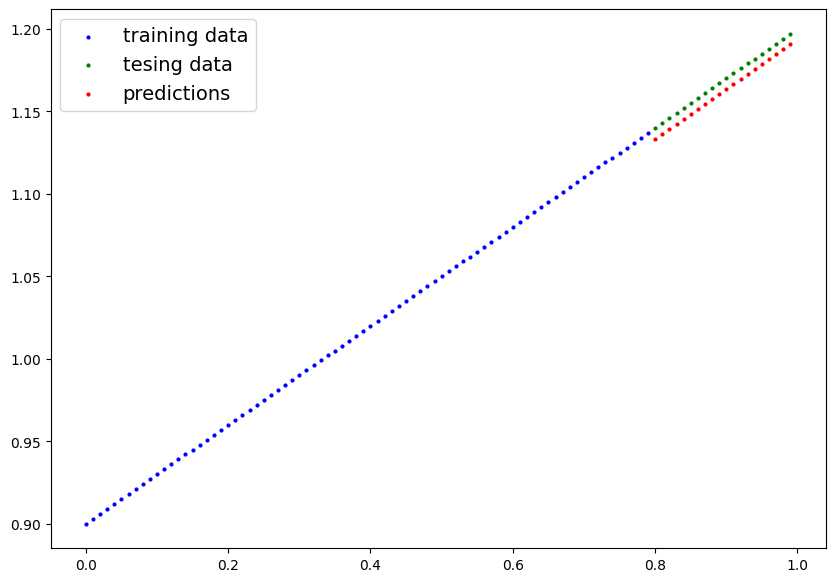

In [11]:
plot_predictions(predictions = y_preds)

5.Save your trained model's state_dict() to file.
Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.

Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [13]:
#saving a model
from pathlib import Path

#create the models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents= True, exist_ok=True)

#create a model save path
MODEL_NAME ="01_pytorch_workflow_model_1_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f'saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

saving model to:models/01_pytorch_workflow_model_1_exercise.pth


In [14]:
#loadig a model
#create a new instance of the model
loaded_model_1 = LinearRegressionModelV2()

#load the model state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [16]:
#evaluate the model

loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])